In [1]:
import sys, os
sys.path.insert(0, '../../')
from pathlib import Path
import math
import numpy as np
import matplotlib.pyplot as plt 
from gasp import dataloader, view

In [2]:
path = Path('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom')
path

PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom')

In [3]:
valid_filetypes=['.dat']
files = []
for item in path.iterdir():
    if os.path.isfile(item) and item.suffix in valid_filetypes:
        files.append(item)
files.sort()
files

[PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID158_trufi_phi0_FID6703.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID159_trufi_phi90_FID6704.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID160_trufi_phi180_FID6705.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID162_trufi_phi270_FID6707.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID164_trufi_phi0_FID6709.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID165_trufi_phi90_FID6710.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID166_trufi_phi180_FID6711.dat'),
 PosixPath('../../data/2017_DeepSSFP/11062017_SSFP_Smoothing_DL_Phantom/meas_MID167_trufi_phi270_FID6712.dat')]

In [17]:
data = dataloader.read_rawdata(files[6], doChaAverage = False, doAveAverage = True);
M = data['data']

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/314M [00:00<?, ?B/s]

read data:   0%|          | 0/19456 [00:00<?, ?it/s]

In [18]:
data['dims']

['Lin', 'Col', 'Cha', 'Par']

In [19]:
data['shape']

(152, 256, 4, 128)

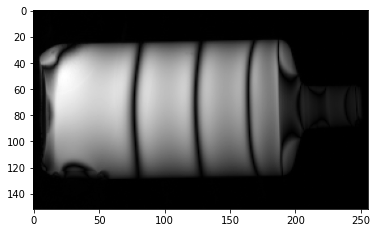

In [20]:
plt.imshow(abs(M[:, :, 0, 64]), cmap='gray')

In [8]:
%%capture
M = []
for file in files:
    data = dataloader.read_rawdata(file, doChaAverage = False);
    M.append(data['data'])

In [9]:
for m in M:
    print(m.shape)

(152, 256, 4, 128)
(152, 256, 4, 128)
(152, 256, 4, 128)
(152, 256, 4, 128)
(152, 256, 4, 128)
(152, 256, 4, 128)
(152, 256, 4, 128)
(152, 256, 4, 128)


In [10]:
Mall = np.stack(M)
print(np.max(abs(Mall)), np.min(abs(Mall)), np.mean(abs(Mall)), np.std(abs(Mall)))
vmax = np.mean(abs(Mall) + 2 * np.std(abs(Mall)))

2.0232941680368423e-05 3.506380750318461e-12 1.312977752338016e-07 6.256776261801532e-07


In [11]:
Mall.shape

(8, 152, 256, 4, 128)

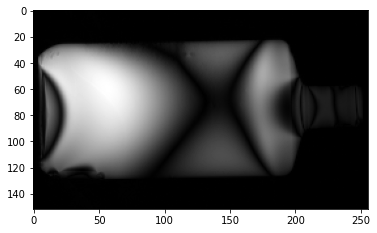

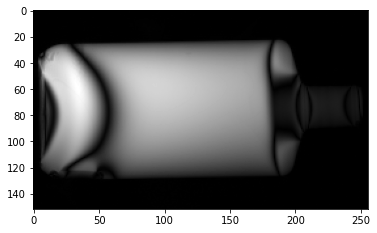

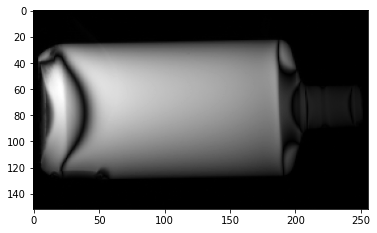

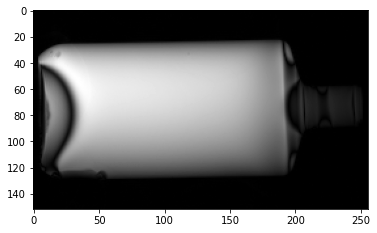

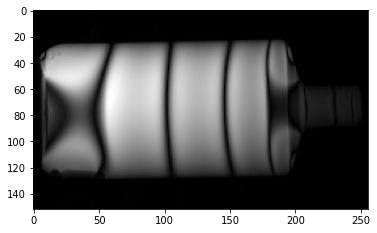

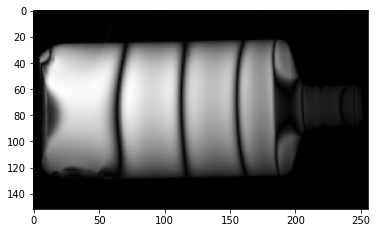

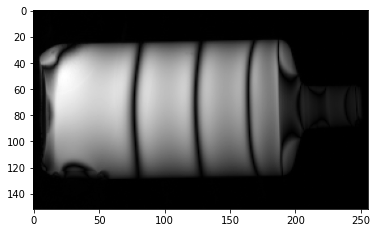

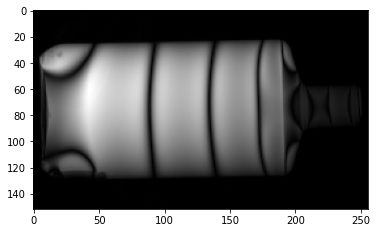

In [12]:
for m in M:
    plt.imshow(abs(m[:, :, 0, 64]), cmap='gray')
    plt.show()